In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=de-the-----de-eso-0087entrytransmissionnl---------,de-the-----de-eso-0087exittransmissionnl---------,de-the-----de-tso-0001entryproduction,de-the-----de-tso-0001entrystorage,de-the-----de-tso-0001entrytransmission,de-the-----de-tso-0001entrytransmissionbe-lux------,de-the-----de-tso-0001entrytransmissioncz---------,de-the-----de-tso-0001entrytransmissionnl---------,de-the-----de-tso-0001entrytransmissionpl-yamal---,de-the-----de-tso-0001exitfinal%20consumers,de-the-----de-tso-0001exitstorage,de-the-----de-tso-0001exittransmissionbe-lux------,de-the-----de-tso-0001exittransmissioncz---------,de-the-----de-tso-0001exittransmissionnl---------,de-the-----de-tso-0001exittransmissionpl-yamal---,de-the-----de-tso-0002entryproduction,de-the-----de-tso-0002entrystorage,de-the-----de-tso-0002entrytransmission,de-the-----de-tso-0002entrytransmissionbe-lux------,de-the-----de-tso-0002entrytransmissionnl---------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesDEDE-THE-----DE-TSO-0001entryProduc...        1   Aggregates   
1    1AggregatesDEDE-THE-----DE-TSO-0001entryStorag...        1   Aggregates   
2    1AggregatesDEDE-THE-----DE-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesDEDE-THE-----DE-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesDEDE-THE-----DE-TSO-0001entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
460  1AggregatesDEDE-THE-----DE-TSO-0001exitTransmi...        1   Aggregates   
461  1AggregatesDEDE-THE-----DE-TSO-0001exitTransmi...        1   Aggregates   
462  1AggregatesDEDE-THE-----DE-TSO-0001exitTransmi...        1   Aggregates   
463  1AggregatesDEDE-THE-----DE-TSO-0002entryProduc...        1   Aggregates   
464  1AggregatesDEDE-THE-----DE-TSO-0002entryStorag...        1   Aggregates   

         indicator periodType        pe

In [4]:
new_mean=df['value'].mean()
print(new_mean)

176592446.93333334


In [5]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day       value
0          entry    2      386131
1          entry    2   157013106
2          entry    2           0
3          entry    2   138143884
4          entry    2           0
..           ...  ...         ...
460         exit    1  1913751926
461         exit    1     8188949
462         exit    1    26107523
463        entry    1      427072
464        entry    1    14303805

[465 rows x 3 columns]


In [6]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         4.012261e+07
    exit          3.450656e+08
2   entry         5.647430e+07
    exit          3.879840e+08
3   entry         5.674924e+07
...                        ...
29  exit          3.738131e+08
30  entry         6.520590e+07
    exit          3.920217e+08
31  entry         6.133567e+07
    exit          3.649489e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

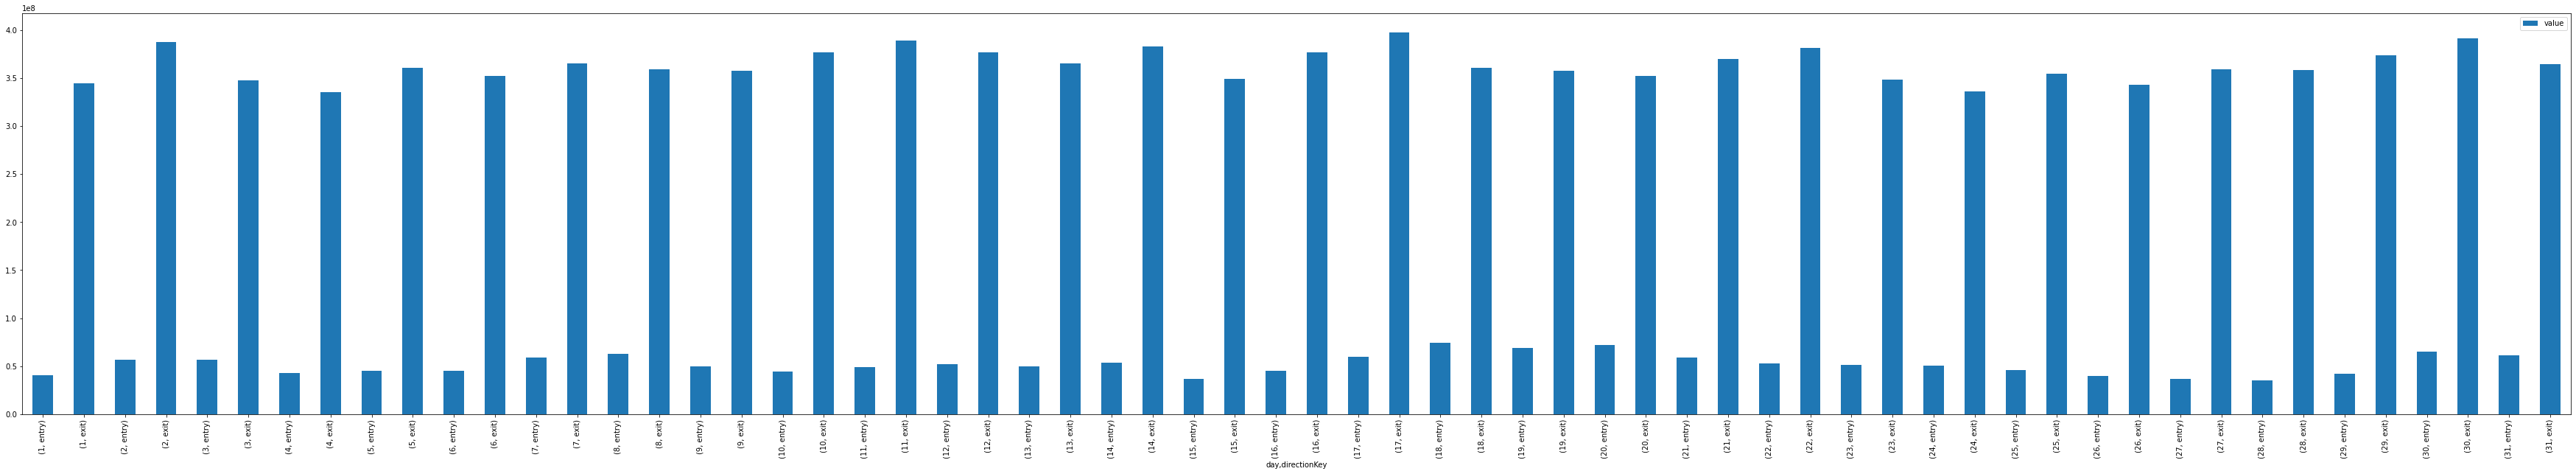

In [7]:
values_by_entry.plot(kind='bar',figsize=(62,10))